In [20]:
from spot_futures_arbitrage.strategy import carry_strategy
from spot_futures_arbitrage.backtest import simple_backtest, run_backtest, summarize_portfolio

import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Example usage of carry strategy
futs = carry_strategy(base='BTC', quote='USDT')

/Users/benjaminlee/personal/spot_futures_arbitrage/.venv/lib/python3.12/site-packages/spot_futures_arbitrage/strategy.py:100: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .last()  # or use .ohlc(), .mean(), etc.


/Users/benjaminlee/personal/spot_futures_arbitrage/.venv/lib/python3.12/site-packages/spot_futures_arbitrage/backtest.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(groupby).apply(backtest_func).reset_index(drop=True)


<Axes: xlabel='datetime', ylabel='cumulative_pnl'>

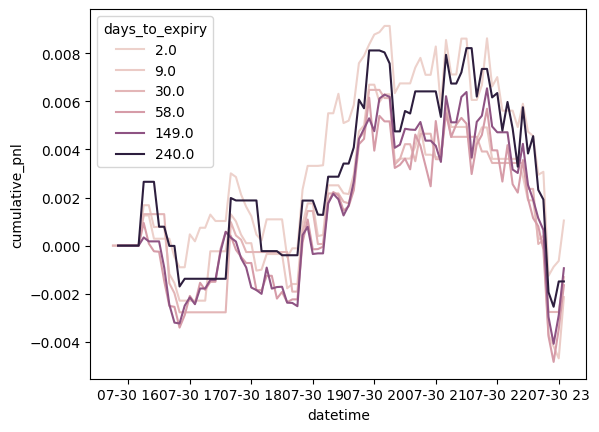

In [13]:
df = run_backtest(futs, simple_backtest, groupby=['symbol', 'fut_pair'])
sns.lineplot(data=df, x='datetime', y='cumulative_pnl', hue='days_to_expiry')

In [14]:
summary = df.groupby('fut_pair').agg(cumulative_pnl=('cumulative_pnl', 'sum'), start_date=('datetime', 'min'), end_date=('datetime', 'max')).reset_index()

In [15]:
summary = summarize_portfolio(df, groupby=['fut_pair'], pnl_col='pnl', cumulative_pnl_col='cumulative_pnl')

In [16]:
summary

,fut_pair,start,end,total_return,volatility,annualized_return,annualized_volatility,max_single_period_drawdown
0,BTC/USDT:USDT,2025-07-30 15:50:00,2025-07-30 23:05:00,-0.002657,0.000927,-4.306717e-10,0.017708,0.003761
1,BTC/USDT:USDT-250801,2025-07-30 15:50:00,2025-07-30 23:05:00,0.001043,0.001016,1.687179e-10,0.019413,0.003761
2,BTC/USDT:USDT-250808,2025-07-30 15:45:00,2025-07-30 23:05:00,-0.002141,0.000969,-3.430431e-10,0.018510,0.003761
3,BTC/USDT:USDT-250829,2025-07-30 15:45:00,2025-07-30 23:05:00,-0.001311,0.000956,-2.099318e-10,0.018266,0.003761
4,BTC/USDT:USDT-250926,2025-07-30 15:50:00,2025-07-30 23:05:00,-0.001646,0.001016,-2.665805e-10,0.019403,0.003761
5,BTC/USDT:USDT-251226,2025-07-30 15:50:00,2025-07-30 23:05:00,-0.000941,0.000977,-1.523729e-10,0.018675,0.003761
6,BTC/USDT:USDT-260327,2025-07-30 15:50:00,2025-07-30 23:05:00,-0.001490,0.001047,-2.412966e-10,0.019995,0.003761
